In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train_data = pd.read_csv("/Users/camalovaae/Documents/train.csv")

In [3]:
test_data = pd.read_csv("/Users/camalovaae/Documents/test.csv")

### STEP 1 Analyze dataset

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# How many null values are there in each columns
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3 columns have null values: Age, Cabin, Embarked

### Sibsp column

Sibsp - siblings/spouses

0 - The passenger has no siblings or spouses

1 or more - The passenger has siblings or spouses

### Parch column

Parch parents/child The passenger has parents or child or has no parents or child
we can sum parch and sibsp column values for to find familysize

train_data['family_size']=train_data['SibSp'] + train_data['Parch']+1 the passenger himself /herself

### Pclass column is ticket class column

The class of a passenger (Pclass) is an important indicator of their likelihood of survival. First-class passengers had a higher chance of survival because they were located on the upper decks of the ship and had an advantage during the evacuation. Third-class passengers had a lower chance of survival because their cabins were located on the lower decks, making it more difficult for them to reach the exits.

### Fare column
The Fare column in the Titanic dataset represents the amount paid by a passenger for their ticket. This column provides valuable information about the passenger's class (Pclass) and their travel conditions.

Characteristics of the Fare column:

Unit of Measurement: British Pounds (£).

Range of Values:

Lowest Amount: 0 (free for some passengers).

Highest Amount: Over 500 (typically for first-class passengers).

### Embarked column

The Embarked column in the Titanic dataset indicates the port from which a passenger boarded the ship. This column provides information related to the passenger's region and social status.

Possible values of the Embarked column:
There are 3 main values in the Embarked column:

In [10]:
train_data.shape

(891, 12)

In [11]:
test_data.shape

(418, 11)

In [12]:
train_data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
test_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [13]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace= True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace= True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Creating Deck columns

The information in the "Cabin" column can indicate which "deck" the passenger is located on the ship. For example:

Cabin = "C85" — here, "C" represents the deck, and "85" is the cabin number.

In [15]:
train_data['Deck'] = train_data['Cabin'].str[0] # take the first letter.
train_data['Deck'] = train_data['Deck'].fillna('U') #we should fill the empty values with 'U'(Unknown)

In [16]:
#the same steps for test_data
test_data['Deck'] = test_data['Cabin'].str[0]
test_data['Deck'] = test_data['Deck'].fillna('U')

In [17]:
train_data['HasCabin'] = train_data['Cabin'].notnull().astype(int)
test_data['HasCabin'] = test_data['Cabin'].notnull().astype(int)

In [18]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,HasCabin
0,0,3,male,22.0,1,0,7.2500,NaN,S,U,0
1,1,1,female,38.0,1,0,71.2833,C85,C,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,U,0
3,1,1,female,35.0,1,0,53.1000,C123,S,C,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,U,0


## Creating Family Size column

In [19]:
train_data['FamilySize']=train_data['SibSp']+train_data['Parch']+1 #including the passengers themselves
test_data['FamilySize']= train_data['SibSp']+train_data['Parch']+1

In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,HasCabin,FamilySize
0,0,3,male,22.0,1,0,7.2500,NaN,S,U,0,2
1,1,1,female,38.0,1,0,71.2833,C85,C,C,1,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,U,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,C,1,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,U,0,1


In [21]:
def family_size_group(size):
    if size==1:
        return 'single'
    elif 2<= size <= 4:
        return 'small'
    else:
        return 'large'
    
train_data['FamilyGroup']=train_data['FamilySize'].apply(family_size_group)
test_data['FamilyGroup']=test_data['FamilySize'].apply(family_size_group)

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,HasCabin,FamilySize,FamilyGroup
0,0,3,male,22.0,1,0,7.2500,NaN,S,U,0,2,small
1,1,1,female,38.0,1,0,71.2833,C85,C,C,1,2,small
2,1,3,female,26.0,0,0,7.9250,NaN,S,U,0,1,single
3,1,1,female,35.0,1,0,53.1000,C123,S,C,1,2,small
4,0,3,male,35.0,0,0,8.0500,NaN,S,U,0,1,single


In [23]:
print(train_data['FamilyGroup'].value_counts())

single    537
small     292
large      62
Name: FamilyGroup, dtype: int64


#### Analyzing the unique values of columns

In [24]:
train_data.Pclass.nunique()

3

In [25]:
train_data.SibSp.nunique()

7

In [26]:
train_data.Parch.nunique()

7

In [27]:
train_data.Embarked.nunique()

3

In [28]:
train_data.Deck.nunique()

9

In [29]:
train_data.FamilySize.nunique()

9

### Analyzing the value counts of unique values in columns 

In [30]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
train_data['FamilyGroup'].value_counts()

single    537
small     292
large      62
Name: FamilyGroup, dtype: int64

In [35]:
train_data['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [36]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Relationship between target and features

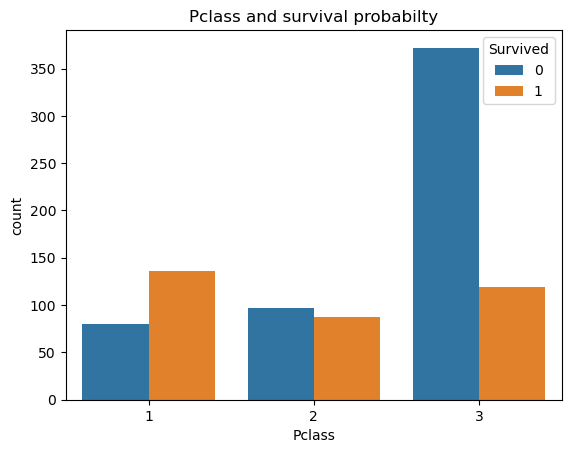

In [37]:
# relationship between survival probabilty and Pclass
sns.countplot(x='Pclass', hue='Survived', data= train_data)
plt.title('Pclass and survival probabilty')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

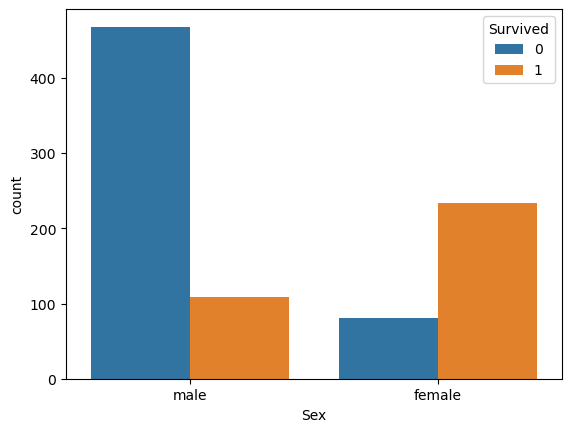

In [38]:
# relationship between survival probabilty and gender
sns.countplot(x='Sex', hue= 'Survived', data = train_data)
plt.show

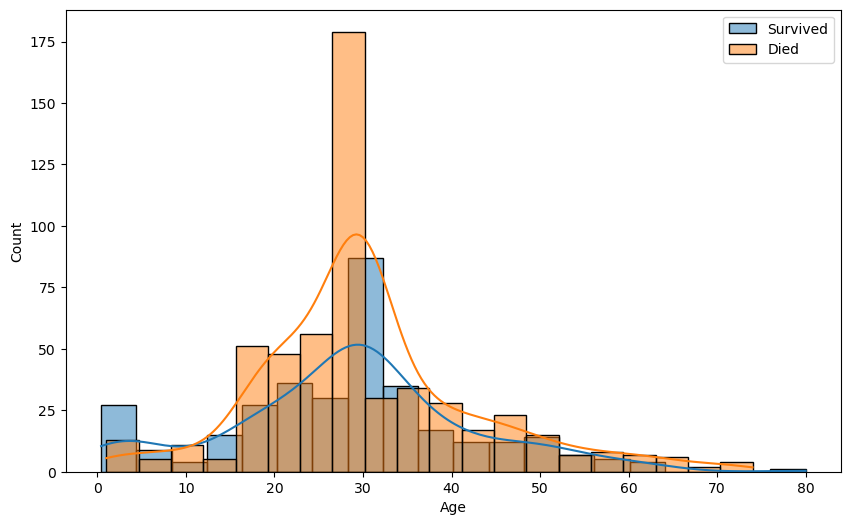

In [39]:
#relationship between survival probabilty and age
plt.figure(figsize=(10,6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=20, kde=True, label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=20, kde=True, label='Died')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

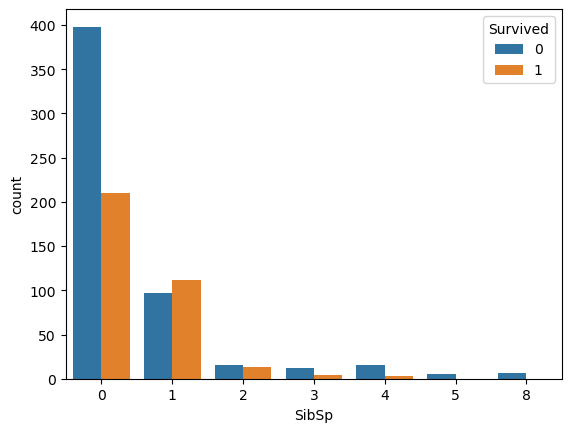

In [40]:
# relationship between survival probabilty and gender
sns.countplot(x='SibSp', hue= 'Survived', data = train_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

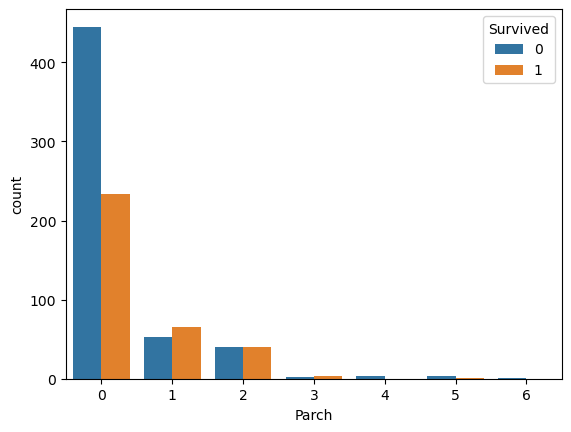

In [41]:
# relationship between survival probabilty and gender
sns.countplot(x='Parch', hue= 'Survived', data = train_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

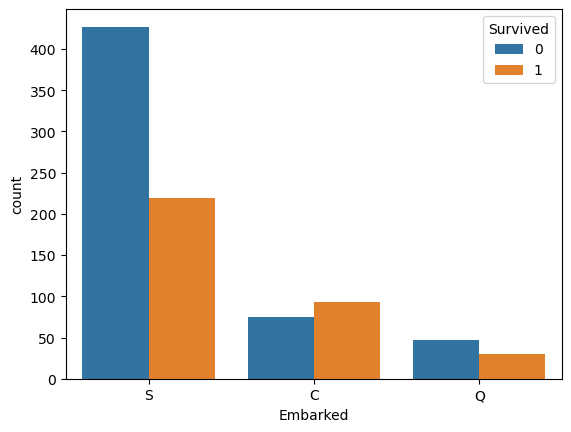

In [42]:
# relationship between survival probabilty and gender
sns.countplot(x='Embarked', hue= 'Survived', data = train_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

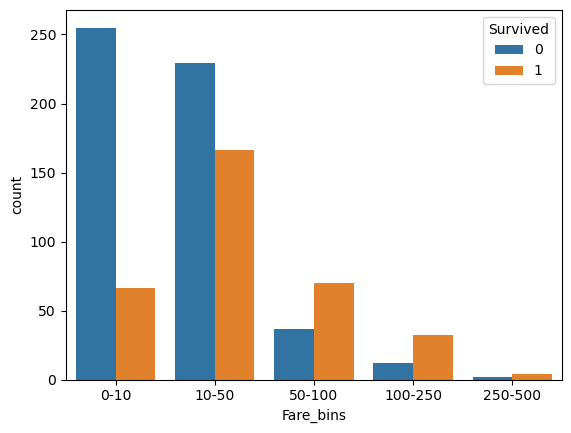

In [43]:
# relationship between survival probabilty and gender
train_data['Fare_bins'] = pd.cut(train_data['Fare'], bins=[0,10,50,100,250,500], 
                                 labels=['0-10','10-50','50-100','100-250','250-500'])
sns.countplot(x='Fare_bins', hue= 'Survived', data = train_data)
plt.show

In [44]:
train_data = train_data.drop('Fare_bins', axis=1)

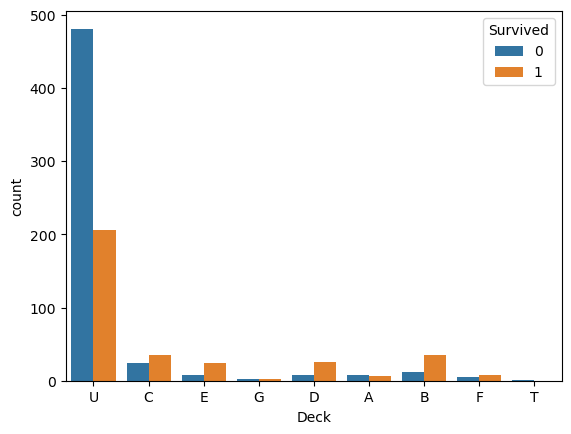

In [45]:
#relationshop between survival probabilty and deck
sns.countplot(x='Deck', hue='Survived', data=train_data)
plt.show()

<Axes: xlabel='FamilyGroup', ylabel='count'>

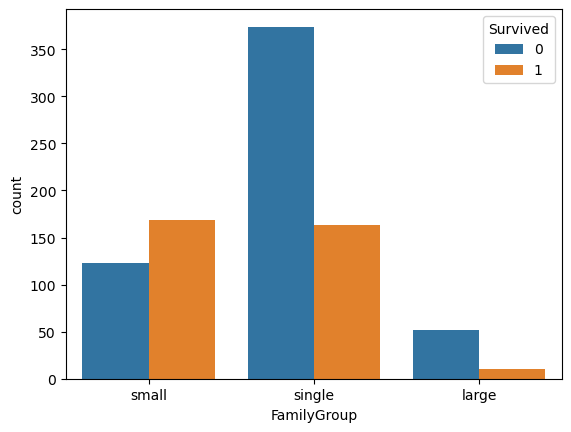

In [46]:
sns.countplot(x='FamilyGroup', hue ='Survived', data = train_data)

### FEATURE SCALİNG AND ENCODİNG

Many machine learning algorithms, such as Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Neural Networks, are negatively affected by input variables being on different scales.

For example:

Values in the Age column might range between 0 and 80.

Values in the Fare column might range between 0 and 500.

Due to this difference, the algorithm might focus more on the Fare feature, leading to imbalanced models. By using StandardScaler, all variables are scaled to the same range (mean = 0, standard deviation = 1). This allows models to fairly compare features.

The StandardScaler uses the following formula to standardize features:

z= (x−μ)/ σ
 
Where:

x: The original value of the variable (data point).

μ: The mean of the column.

σ: The standard deviation of the column.

z: The standardized value (the new scaled form of the data).

For methods working with multiple columns, the DataFrame format ([['column1', 'column2']]) is used.

For methods working with a single column, the Series format (['column']) is used.

In [47]:
scaler= StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age','Fare']])
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

In [48]:
lab_enc = LabelEncoder()
train_data['Sex'] = lab_enc.fit_transform(train_data['Sex'])
test_data['Sex'] = lab_enc.fit_transform(test_data['Sex'])

train_data['Embarked'] = lab_enc.fit_transform(train_data['Embarked'])
test_data['Embarked'] = lab_enc.fit_transform(test_data['Embarked'])

In [49]:
train_data = pd.get_dummies(train_data, columns=['FamilyGroup'], drop_first=False)

In [50]:
test_data= pd.get_dummies(test_data, columns=['FamilyGroup'], drop_first=False)

In [51]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,HasCabin,FamilySize,FamilyGroup_large,FamilyGroup_single,FamilyGroup_small
0,0,3,1,-0.592481,1,0,-0.502445,NaN,2,U,0,2,0,0,1
1,1,1,0,0.638789,1,0,0.786845,C85,0,C,1,2,0,0,1
2,1,3,0,-0.284663,0,0,-0.488854,NaN,2,U,0,1,0,1,0
3,1,1,0,0.407926,1,0,0.420730,C123,2,C,1,2,0,0,1
4,0,3,1,0.407926,0,0,-0.486337,NaN,2,U,0,1,0,1,0


In [52]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,HasCabin,FamilySize,FamilyGroup_large,FamilyGroup_single,FamilyGroup_small
0,3,1,0.334993,0,0,-0.497811,NaN,1,U,0,2,0,0,1
1,3,0,1.325530,1,0,-0.512660,NaN,2,U,0,2,0,0,1
2,2,1,2.514175,0,0,-0.464532,NaN,1,U,0,1,0,1,0
3,3,1,-0.259330,0,0,-0.482888,NaN,2,U,0,2,0,0,1
4,3,0,-0.655545,1,1,-0.417971,NaN,2,U,0,1,0,1,0


### Correlation Analysis

/var/folders/xs/ny9w503n7d5bmvbcms4lnp640000gn/T/ipykernel_47182/1151480947.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


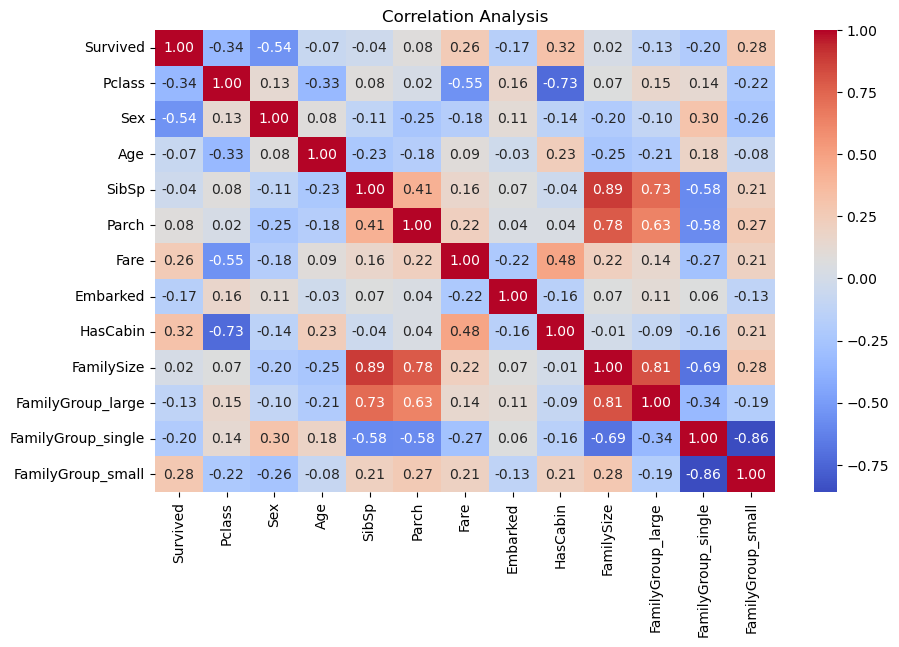

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame üçün korrelyasiya matrisini hesablayırıq
correlation_matrix = train_data.corr()

# Seaborn ilə korrelyasiya xəritəsini çəkirik
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis")
plt.show()

### Which column is the most important FamilyGroup_small or FamilyGroup_single?

You should choose between FamilyGroup_small and FamilyGroup_single based on your model's objective.

The correlation of -0.86 between these two columns is very high, meaning if you use one, you can exclude the other. 

The choice depends on the specific goal of your model.

### Selection Criteria:

✅ 1. Choose the one that makes more sense for the model

If you want to analyze the impact of small families, keep FamilyGroup_small.

If you want to analyze the impact of solo travelers, keep FamilyGroup_single.

✅ 2. Check correlation with the target variable (Survived)

FamilyGroup_small and Survived correlation: 0.28

FamilyGroup_single and Survived correlation: -0.20

This means that small families are more likely to survive, whereas solo travelers have a lower survival rate.

If you want to keep the variable that has a stronger impact on survival probability, FamilyGroup_small is a better choice.

If you specifically want to analyze the survival probability of solo travelers, you can keep FamilyGroup_single, as it has a negative correlation (-0.20), meaning their survival chances are lower.

In most cases, keeping FamilyGroup_small is the better option!

In [54]:
train_data.drop('FamilyGroup_single', axis=1, inplace=True)

In [55]:
test_data.drop('FamilyGroup_single', axis=1, inplace=True)

In [56]:
train_data.drop(['SibSp','Parch'], axis=1, inplace=True)
test_data.drop(['SibSp','Parch'], axis=1, inplace=True)

train_data.drop(['FamilyGroup_large'], axis=1, inplace=True)
test_data.drop(['FamilyGroup_large'], axis=1, inplace=True)

In [57]:
train_data.drop(['Cabin','Deck'], axis=1, inplace=True)

In [58]:
test_data.drop(['Cabin','Deck'], axis=1, inplace=True)

In [59]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,FamilyGroup_small
0,0,3,1,-0.592481,-0.502445,2,0,2,1
1,1,1,0,0.638789,0.786845,0,1,2,1
2,1,3,0,-0.284663,-0.488854,2,0,1,0
3,1,1,0,0.407926,0.420730,2,1,2,1
4,0,3,1,0.407926,-0.486337,2,0,1,0


In [60]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,FamilyGroup_small
0,3,1,0.334993,-0.497811,1,0,2,1
1,3,0,1.325530,-0.512660,2,0,2,1
2,2,1,2.514175,-0.464532,1,0,1,0
3,3,1,-0.259330,-0.482888,2,0,2,1
4,3,0,-0.655545,-0.417971,2,0,1,0


In [61]:
#fill missing values with the mean valuea

In [62]:
from sklearn.impute import SimpleImputer
imput_values= SimpleImputer(strategy='mean')
test_data.iloc[:, 1:]=imput_values.fit_transform(test_data.iloc[:,1:])

/var/folders/xs/ny9w503n7d5bmvbcms4lnp640000gn/T/ipykernel_47182/1278493914.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_data.iloc[:, 1:]=imput_values.fit_transform(test_data.iloc[:,1:])


In [63]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,FamilyGroup_small
0,3,1.0,0.334993,-0.497811,1.0,0.0,2.0,1.0
1,3,0.0,1.325530,-0.512660,2.0,0.0,2.0,1.0
2,2,1.0,2.514175,-0.464532,1.0,0.0,1.0,0.0
3,3,1.0,-0.259330,-0.482888,2.0,0.0,2.0,1.0
4,3,0.0,-0.655545,-0.417971,2.0,0.0,1.0,0.0


In [64]:
train_data.isnull().sum()

Survived             0
Pclass               0
Sex                  0
Age                  0
Fare                 0
Embarked             0
HasCabin             0
FamilySize           0
FamilyGroup_small    0
dtype: int64

In [65]:
test_data.isnull().sum()

Pclass               0
Sex                  0
Age                  0
Fare                 0
Embarked             0
HasCabin             0
FamilySize           0
FamilyGroup_small    0
dtype: int64

### Modelling

### DATA SPLITTING

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Seperate features and target variables
X_train = train_data.drop(['Survived'], axis=1) #all columns except "Survived"
y_train = train_data['Survived'] #only "Survived" column

In [68]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.2, random_state=42)

X_train: features for train data

X_test: features for test data

y_train: target variable for train data

y_test: target variable for test data

### Creating logistic regression model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
X_train

,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,FamilyGroup_small
331,1,1,1.215947,-0.074583,2,1,1,0
733,2,1,-0.515526,-0.386671,2,0,1,0
382,3,1,0.177063,-0.488854,2,0,1,0
704,3,1,-0.284663,-0.490280,2,0,2,1
813,3,0,-1.823750,-0.018709,2,0,7,0
...,...,...,...,...,...,...,...,...
106,3,0,-0.669435,-0.494391,2,0,1,0
270,1,1,0.000000,-0.024246,2,0,1,0
860,3,1,0.869652,-0.364355,2,0,3,1
435,1,0,-1.208115,1.767741,2,1,4,1


In [71]:
X_test

,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,FamilyGroup_small
709,3,1,0.000000,-0.341452,0,0,3,1
439,2,1,0.100109,-0.437007,2,0,1,0
840,3,1,-0.746389,-0.488854,2,0,1,0
720,2,0,-1.823750,0.016023,2,0,2,1
39,3,0,-1.208115,-0.422074,0,0,2,1
...,...,...,...,...,...,...,...,...
433,3,1,-0.977252,-0.504962,2,0,1,0
773,3,1,0.000000,-0.502949,0,0,1,0
25,3,0,0.638789,-0.016444,2,0,7,0
84,2,0,-0.977252,-0.437007,2,0,1,0


In [73]:
y_train_pred= model_lr.predict(X_train)

In [74]:
y_test_pred= model_lr.predict(X_test)

### Accuracy Score

It measures the percentage of the model's total predictions that are correct.

In [75]:
train_accuracy=accuracy_score(y_train_pred, y_train)
train_accuracy

0.8103932584269663

In [76]:
test_accuracy=accuracy_score(y_test_pred, y_test)
test_accuracy

0.8044692737430168

### Precision Score

Precision measures the percentage of predicted positives that are correct.

The first parameter should be the actual values (y_train).

The second parameter should be the predicted values by the model (y_train_pred).

In metrics like precision_score, recall_score, and f1_score, the actual values (y_true) should always be written first, and the predicted values (y_pred) second.

In [77]:
train_precision= precision_score(y_train, y_train_pred)
train_precision

0.7692307692307693

In [78]:
test_precision= precision_score(y_test, y_test_pred)
test_precision

0.782608695652174

### Recall_score

In [79]:
train_recall= recall_score(y_train, y_train_pred)
train_recall

0.7089552238805971

In [80]:
test_recall = recall_score(y_test, y_test_pred)
test_recall

0.7297297297297297

### F1_score

In [81]:
train_f1score = f1_score(y_train, y_train_pred)
train_f1score

0.7378640776699029

In [82]:
test_f1score=f1_score(y_test, y_test_pred)
test_f1score

0.7552447552447553

In [83]:
all_metrics = pd.DataFrame({'Model_name': ['Logistic Regression','Logistic Regression'],
                            'Split_data': ['Train_data','Test_data'],
                            'Accuracy_score':[train_accuracy, test_accuracy],
                            'Precision_score':[train_precision,test_precision],
                            'Recall_score':[train_recall,test_recall],
                            'F1_score': [train_f1score, test_f1score]
                          })


In [84]:
all_metrics

,Model_name,Split_data,Accuracy_score,Precision_score,Recall_score,F1_score
0,Logistic Regression,Train_data,0.810393,0.769231,0.708955,0.737864
1,Logistic Regression,Test_data,0.804469,0.782609,0.729730,0.755245
